In [1]:
import matplotlib.pyplot as plt  # matplotlib 설치시 혹은 터미널 시작시, 1번과 2번, 3번 명령어 입력으로 폰트깨짐 해결.(Mac 한정.)
from matplotlib import rc        # 1번
rc('font', family='AppleGothic') # 2번
plt.rcParams['axes.unicode_minus'] = False #3번

kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 상반기, 하반기 주유소 가격 데이터 조회
# 상반기.
fh = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding='cp949')
fh

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0
...,...,...,...,...,...,...,...,...,...,...,...
82684,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),20220507,현대오일뱅크,셀프,2152,1910,1841,0
82685,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),20220508,현대오일뱅크,셀프,2152,1910,1841,0
82686,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),20220509,현대오일뱅크,셀프,2152,1910,1841,0
82687,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),20220510,현대오일뱅크,셀프,2152,1910,1841,0


In [4]:
# 하반기
sh = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding='cp949')
sh

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220701,SK에너지,셀프,2487,2287,2297,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220702,SK에너지,셀프,2447,2247,2277,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220703,SK에너지,셀프,2447,2247,2277,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220704,SK에너지,셀프,2447,2247,2277,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220705,SK에너지,셀프,2447,2247,2277,0
...,...,...,...,...,...,...,...,...,...,...,...
81788,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
81789,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
81790,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
81791,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0


In [5]:
# 상반기, 하반기 DataFrame 합치기
df = pd.concat([fh, sh],ignore_index=True)   # 앞에 번호를 합치는게 의미가 없어서 무시하라고 집시(둘다 8만,8만)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0
...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0


In [7]:
df.tail()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0
164481,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221231,GS칼텍스,셀프,0,1515,1715,0


In [9]:
# DataFrame 기본 정보 조회
df.shape

(164482, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


In [392]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0


In [393]:
df.tail()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0
164481,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221231,GS칼텍스,셀프,0,1515,1715,0


In [10]:
df.isnull().sum()   #결측치 확인

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [395]:
df.describe()   # 정수/실수 타입 컬럼

,기간,고급휘발유,휘발유,경유,실내등유
count,1.644820e+05,164482.000000,164482.000000,164482.000000,164482.000000
mean,2.022066e+07,1083.639146,1877.600838,1907.360337,538.948444
std,3.456995e+02,1085.018886,243.317021,237.067045,761.401689
min,2.022010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.022033e+07,0.000000,1690.000000,1817.000000,0.000000
50%,2.022063e+07,1760.000000,1855.000000,1899.000000,0.000000
75%,2.022093e+07,2130.000000,2030.000000,2018.000000,1451.000000
max,2.022123e+07,3496.000000,3096.000000,3230.000000,2719.000000


In [10]:
df.describe(include='object')   #문자열(object) 확인

,번호,지역,상호,주소,상표,셀프여부
count,164482,164482,164482,164482,164482,164482
unique,469,25,464,469,7,2
top,A0006039,서울 강남구,대성주유소,서울 강남구 논현로 640,SK에너지,셀프
freq,365,12278,730,365,48267,92478


In [6]:
# 상표 컬럼의 고유값 조회
# df['상표'].unique()   # 이름만
df['상표'].value_counts()  # 개수
# df['상표'].value_counts(normalize=True)  # 비율

SK에너지     48267
현대오일뱅크    42351
GS칼텍스     40449
S-OIL     28762
알뜰주유소      3551
자가상표        737
알뜰(ex)      365
Name: 상표, dtype: int64

In [7]:
# # 지역 컬럼의 고유값 조회
# df['지역'].unique()   # 지역구 이름.
df['지역'].value_counts()   # 지역구에 있는 주유소의 개수
# df['지역'].value_counts(normalize=True)  # 구별 주유소의 비율

서울 강남구     12278
서울 강서구     11825
서울 송파구     11295
서울 서초구     11231
서울 영등포구     9814
서울 양천구      9015
서울 성북구      8522
서울 구로구      7384
서울 동대문구     6574
서울 성동구      6006
서울 도봉구      5992
서울 은평구      5807
서울 노원구      5474
서울 서대문구     5472
서울 강동구      5110
서울 광진구      5107
서울 관악구      5104
서울 중랑구      4873
서울 용산구      4637
서울 강북구      4460
서울 마포구      4375
서울 금천구      4067
서울 중구       3643
서울 동작구      3436
서울 종로구      2981
Name: 지역, dtype: int64

In [8]:
df['셀프여부'].value_counts()

셀프    92478
일반    72004
Name: 셀프여부, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [9]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)

def split_data(df):
    지역구 = df.split("울")[1].split(" ")[1]
    return 지역구

df["지역구"] = df["지역"].apply(split_data)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0,중랑구
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0,중랑구
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0,중랑구
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0,중랑구


In [15]:
'서울 강남구'.split()[1]
# '서울 강남구'.slice(3).  ==> accessor에서 사용 / 
'서울 강남구'[3:]

'강남구'

In [16]:
#### 선생님 것 ####
df['지역구'] = df['지역'].apply(lambda x : x.split()[1]) #--> 위의 예시처럼 apply와 람다 split 사용해서 자르자.
# df['지역'].str.slice(3) ==> 더 간단한 방법.
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0,중랑구
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0,중랑구
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0,중랑구
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0,중랑구


In [10]:
# 기간 컬럼을 datetime 타입으로 변경
df['기간'] = df['기간'].astype('str')
df['기간'] = pd.to_datetime(df['기간'])
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구


In [ ]:
#### 선생님 버전 ####
# 선생님은 내 위 순서를 생략하고 바로 아래 것 적용하셨네. 
# df['기간'] = pd.to_datetime(df['기간'], format='%Y-%m-%d')

In [11]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
# object 타입을 datetime64[ns] 타입으로 바꾼다 
df['기간'] = pd.to_datetime(df['기간'], format='%Y-%m-%d', errors='raise')

In [12]:
df['기간_년도'] = df['기간'].dt.year         # 연(4자리숫자)
df['기간_월'] = df['기간'].dt.month        # 월(숫자)
df['기간_일'] = df['기간'].dt.day          # 일(숫자)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,1
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,2
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,3
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,4
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,2022,12,27
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,2022,12,28
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,2022,12,29
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,2022,12,30


In [17]:
#### 선생님 버전 ####
df['년도'] = df['기간'].dt.year         # 연(4자리숫자)
df['월'] = df['기간'].dt.month        # 월(숫자)
df['일'] = df['기간'].dt.day          # 일(숫자)
df['요일'] = df['기간'].dt.weekday     

In [18]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일,년도,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,1,2022,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,2,2022,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,3,2022,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,4,2022,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,5,2022,1,5,2


In [19]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경

# 0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
weekday_list = ['0-월', '1-화', '2-수', '3-목', '4-금', '5-토', '6-일']

# apply 함수로 숫자 -> 요일 이름으로 변환
df['요일'] = df.apply(lambda x : weekday_list[x['요일숫자']], axis = 1)
df

## 선생님 버전 ####
# df['요일'] = df['요일'].appl 나중에....

KeyError: '요일숫자'

In [ ]:
-----------------------------------------------------------------------------------------------------------

In [20]:
#전처리 완료
df.to_csv('data/2022년_주유소가격데이터_processing.csv',index=False)

In [21]:
df2 = pd.read_csv('data/2022년_주유소가격데이터_processing.csv')
df2.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일,년도,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,1,2022,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,2,2022,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,3,2022,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,4,2022,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,2022,1,5,2022,1,5,2


In [22]:
# 휘발유 가격이 가장 비싼 5개 행 조회
# df.sort_values('휘발유').tail(5)

### 선생님 버전 ####
df.sort_values('휘발유',ascending=False).head()

df.sort_values(['휘발유', '기간'],ascending=[False, True]).head() # ==> 날짜까지 분류

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일,년도,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,22,2022,6,22,2
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,23,2022,6,23,3
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,24,2022,6,24,4
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,25,2022,6,25,5
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,26,2022,6,26,6


In [23]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)


### 선생님 버전  ###
df.sort_values(['휘발유','기간']).head()  #0원만 나옴..
df[df['휘발유'] !=0].sort_values(['휘발유','기간']).head()  #0원만 나옴..
# # 선생님 버전 2
df.query('휘발유 != 0').sort_values(['휘발유','기간']).head()  

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일,년도,월,일,요일
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,2022,12,23,2022,12,23,4
99494,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-23,알뜰주유소,셀프,0,1410,1660,0,강서구,2022,12,23,2022,12,23,4
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,2022,12,24,2022,12,24,5
99495,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-24,알뜰주유소,셀프,0,1410,1660,0,강서구,2022,12,24,2022,12,24,5
148431,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-24,S-OIL,셀프,0,1410,1660,0,양천구,2022,12,24,2022,12,24,5


In [24]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values(['고급휘발유', '기간'],ascending=[False, True]).head() # ==> 날짜까지 분류

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일,년도,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,22,2022,6,22,2
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,23,2022,6,23,3
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,24,2022,6,24,4
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,25,2022,6,25,5
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,2022,6,26,2022,6,26,6


In [25]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['고급휘발유'] != 0].sort_values('고급휘발유').head()

#선생님 버전
df.query('고급휘발유 != 0').sort_values(['고급휘발유','기간']).head()   

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일,년도,월,일,요일
98570,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-19,S-OIL,셀프,1599,1527,1787,0,강서구,2022,12,19,2022,12,19,0
98571,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,2022,12,20,2022,12,20,1
98572,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,2022,12,21,2022,12,21,2
98573,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,2022,12,22,2022,12,22,3
98574,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,2022,12,23,2022,12,23,4


In [26]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values('경유').tail(5)

# 선생님 버전
df.sort_values(['경유', '기간'],ascending=[False, True]).head() # ==> 날짜까지 분류

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일,년도,월,일,요일
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,2022,6,28,2022,6,28,1
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,2022,6,29,2022,6,29,2
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,2022,6,30,2022,6,30,3
160618,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,2022,7,1,2022,7,1,4
160619,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-02,SK에너지,일반,3481,3081,3230,2703,중구,2022,7,2,2022,7,2,5


In [27]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['경유'] != 0].sort_values('경유').head()

#선생님 버전
df.query('경유 != 0').sort_values(['경유','기간']).head()   

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,지역구,기간_년도,기간_월,기간_일
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,2022,1,16
23999,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-01,현대오일뱅크,셀프,0,1577,1377,0,구로구,2022,1,1
24000,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-02,현대오일뱅크,셀프,0,1577,1377,0,구로구,2022,1,2
24001,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-03,현대오일뱅크,셀프,0,1577,1377,0,구로구,2022,1,3
24002,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-04,현대오일뱅크,셀프,0,1577,1377,0,구로구,2022,1,4


In [27]:
# 상표별 휘발유 평균가격 조회
ave_price = df.groupby('상표')['휘발유'].mean().sort_values()
ave_price


상표
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
S-OIL     1859.282595
GS칼텍스     1904.899429
SK에너지     1908.900823
Name: 휘발유, dtype: float64

<AxesSubplot:title={'center':'상표별 휘발유 평균가격'}, ylabel='Brand'>

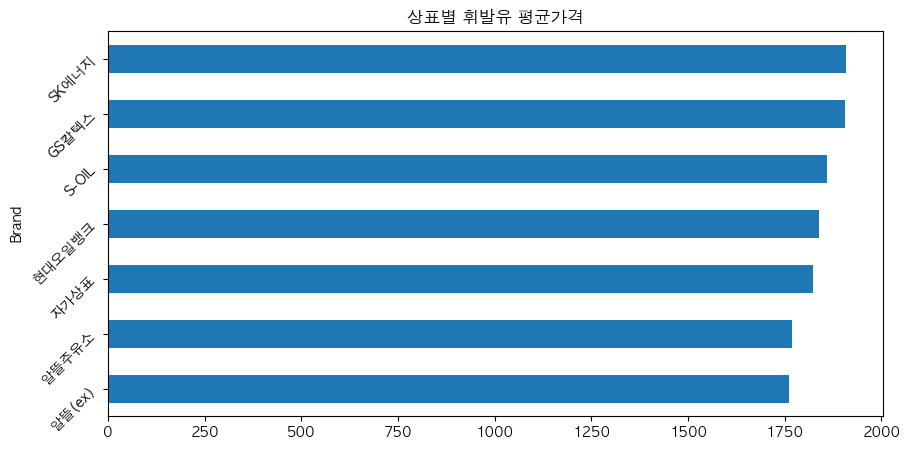

In [28]:
# 상표별 휘발유 평균가격 시각화
# plt.bar(ave_price.index, ave_price)

ave_price.plot(kind='barh', title='상표별 휘발유 평균가격', xlabel='Brand', ylabel='평균가격', 
              figsize=(10,5), rot=45)



In [458]:
## 선생님 것 ### 
 # 위 표 bar로 변경하고 다시 셋팅하는 것-> 내가 해보자.
 #아래 레전드 넣기

# 휘발유전체평균 = np.round(df['휘발유'].mean(), 2)   ===>
# plt.axhline


In [29]:
# 셀프주유소와 일반주유소 개수 확인
df['셀프여부'].value_counts()
# df['셀프여부'].value_counts(normalize=True) # 비율로 확인


셀프    92478
일반    72004
Name: 셀프여부, dtype: int64

In [30]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
df.groupby('셀프여부')['휘발유'].mean()
df.query("휘발유 != 0").groupby('셀프여부')['휘발유'].mean()    # 0원 가격은 주유소들은 빼고.

셀프여부
셀프    1820.637908
일반    1958.713098
Name: 휘발유, dtype: float64

In [31]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
ave_price2 =df.groupby(['상표','셀프여부'])['휘발유'].mean().to_frame()   #  정렬해서 보려면 마지막에 to_frame 붙히자. 
ave_price2



휘발유
상표     셀프여부             
GS칼텍스  셀프    1825.849350
       일반    2001.420217
S-OIL  셀프    1820.122748
       일반    1932.115939
SK에너지  셀프    1826.717027
       일반    2003.229520
알뜰(ex) 셀프    1759.884932
알뜰주유소  셀프    1754.261378
       일반    1796.201557
자가상표   셀프    2017.000000
       일반    1821.768493
현대오일뱅크 셀프    1807.265898
       일반    1877.606059

In [32]:
df.groupby(['상표','셀프여부'])['휘발유'].mean().unstack()  ## 언스텍으로 인덱스를 컬럼으로, 컬럼을 인덱스로. / 
                                                       ## level=0 하면 첫번째 인덱스, level=2하면 두번째 인덱스.

셀프여부,셀프,일반
상표,,
GS칼텍스,1825.849350,2001.420217
S-OIL,1820.122748,1932.115939
SK에너지,1826.717027,2003.229520
알뜰(ex),1759.884932,NaN
알뜰주유소,1754.261378,1796.201557
자가상표,2017.000000,1821.768493
현대오일뱅크,1807.265898,1877.606059


In [33]:
#상표_셀프여부별_휘발유 --- # 피봇 테이블로 표현.
ave_price3 = df.pivot_table(index='상표', columns='셀프여부', values='휘발유', aggfunc='mean', margins=True)  
ave_price3

셀프여부,셀프,일반,All
상표,,,
GS칼텍스,1825.849350,2001.420217,1904.899429
S-OIL,1820.122748,1932.115939,1859.282595
SK에너지,1826.717027,2003.229520,1908.900823
알뜰(ex),1759.884932,NaN,1759.884932
알뜰주유소,1754.261378,1796.201557,1767.914672
자가상표,2017.000000,1821.768493,1823.622795
현대오일뱅크,1807.265898,1877.606059,1839.447215
All,1818.216376,1953.870993,1877.600838


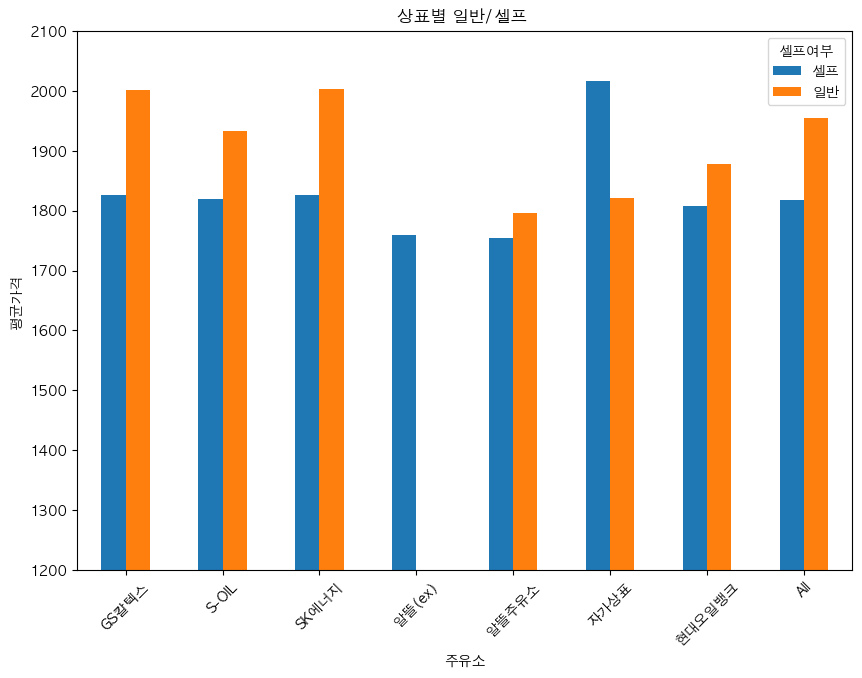

In [34]:
# # 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화  -- bar들을 묶으려면, 피봇테이블로 먼저 표를 만들어서 해야함.

ave_price3[['셀프', '일반']].plot(kind='bar', title='상표별 일반/셀프 ',xlabel='주유소', ylabel='평균가격'
               ,figsize=(10,7), rot=45, ylim=(1200,2100))
plt.show()

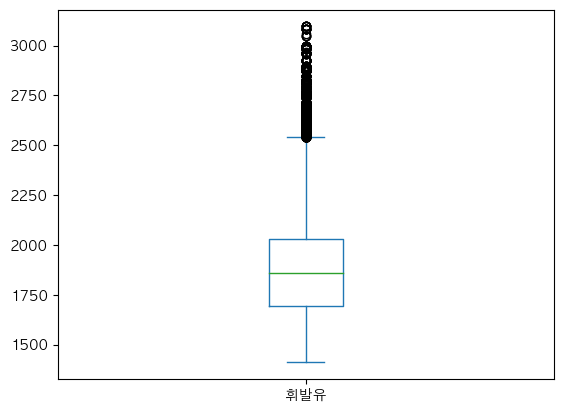

In [35]:
# 휘발유 가격 boxplot
# plt.boxplot(df.query('휘발유 !=0')['휘발유'])
df.query('휘발유 !=0')['휘발유'].plot(kind='box') # 같지만 다른 표현.
plt.show()

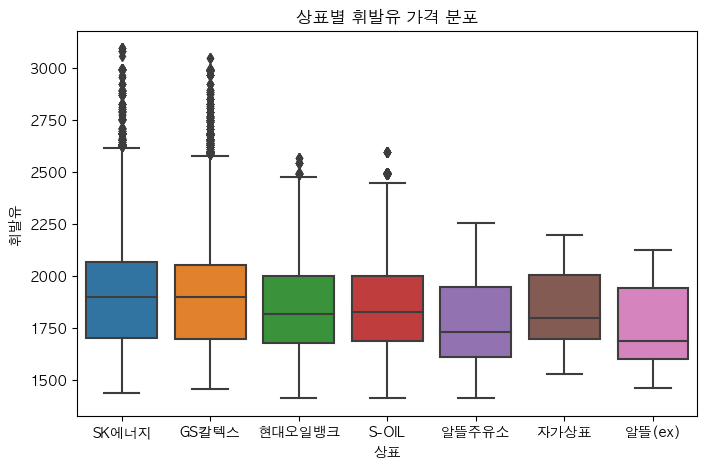

In [36]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
# fig = plt.figure(figsize=(8, 4))
# ax1 = fig.add_subplot(1, 1, 1)

## 선생님 것 ###
# df.query('휘발유 !=0').groupby('상표')['휘발유'].mean()
plt.figure(figsize=(8,5))
sns.boxplot(data=df.query('휘발유 !=0'), y='휘발유', x='상표')  #y축: 연속형 -> 4분위, 정상범위 등을 계산, x: 범주형 - 나누는 대상
plt.title('상표별 휘발유 가격 분포')
plt.show()

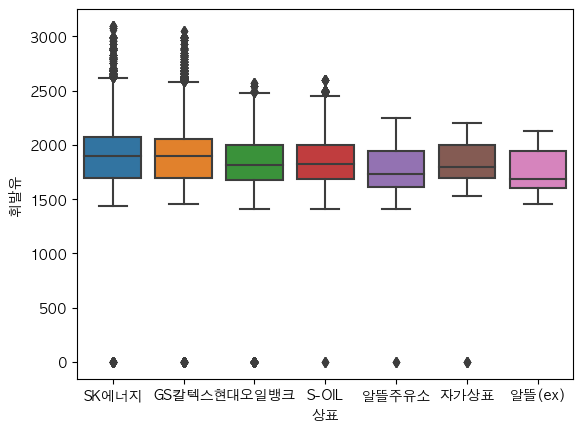

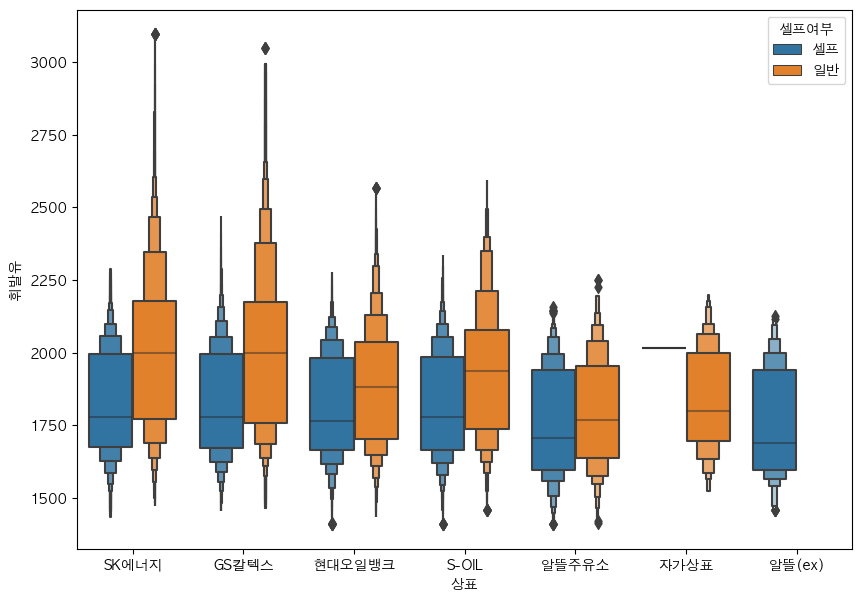

In [37]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.subplot(1,1,1)
sns.boxplot(x='상표',y='휘발유', data=df)


### 선생님 것 ###
plt.figure(figsize=(10,7))
sns.boxenplot(data=df.query('휘발유 !=0'), y='휘발유', x='상표', hue='셀프여부') 
                                                           # hue 범주형 -> 범주 값에 따라 다른 색으로 구분해서 그린다.(따로 그린다.)
                                                           # violinplot으로  해보는 것도 나쁘지 않음. 
plt.show()

In [38]:
# 구별 휘발유 가격의 평균
# ave_region = df.groupby('지역구')['휘발유'].mean().sort_values()
# ave_region

### 선생님 것 #### -- 내 것과 같음.
# df.query('휘발유 !=0').groupby('지역구')['휘발유'].mean().sort_values(ascending=False) ## 내림차순: 높은수부터 배열.
result = df.query('휘발유 !=0').groupby('지역구')['휘발유'].mean().sort_values(ascending=False).to_frame()  
result                                                                                   #표로 넣으려면 to_frame 

,휘발유
지역구,
용산구,2220.150152
중구,2164.813156
종로구,2130.644512
강남구,2027.348234
성동구,1927.180711
강동구,1911.814372
서초구,1908.632928
마포구,1883.471491
영등포구,1867.273173


In [39]:
# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격
# boolean indexing = df[bool연산-행][컬럼명], df.loc[bool연산 -행,컬럼]
df.loc[df['지역구']==result.index[0]].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2386.086653
SK에너지     2245.048402
현대오일뱅크    2013.058905
Name: 휘발유, dtype: float64

In [40]:
# 월 평균 휘발유 가격 # 선생님 버전 #
월평균휘발유가격 = df.query('휘발유!=0').groupby('기간_월')['휘발유'].mean()  
월평균휘발유가격

기간_월
1     1705.212460
2     1782.078505
3     2011.746876
4     2036.850250
5     2027.546073
6     2151.490272
7     2082.968590
8     1858.737602
9     1799.950232
10    1737.664435
11    1719.719665
12    1648.983053
Name: 휘발유, dtype: float64

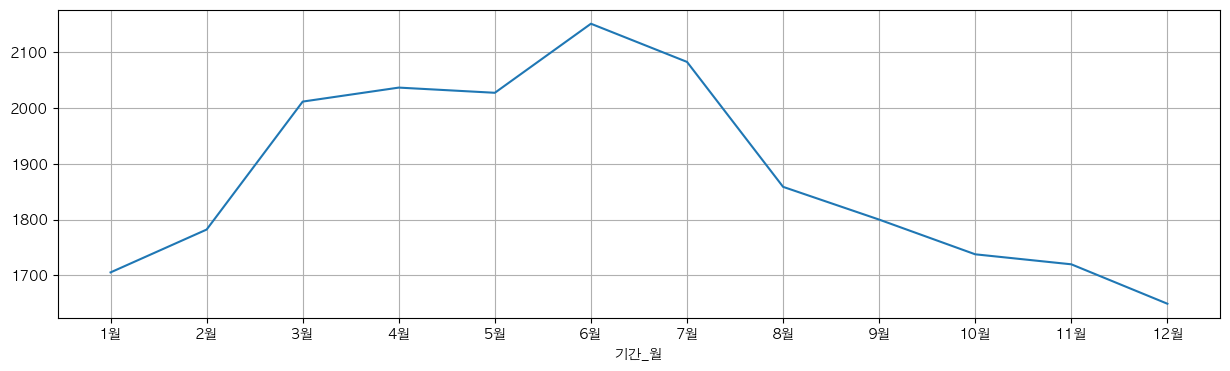

In [41]:
# 월 평균 휘발유 가격 변화추이를 시각화 ## 선생님 버전 ##
월평균휘발유가격.plot(figsize=(15,4))
plt.xticks(range(1,13), labels=[str(i)+'월' for i in range(1,13)])
plt.grid(True)
plt.show()

In [42]:
# 각 구의 월별 평균 휘발유 가격 
# dr = df.groupby(['기간_월','지역구'])['휘발유'].mean()
# dr
# pd.option--> 선생님이한 것 추가하기
## 선생님 버전 ##
구별_월별평균휘발유가격 = np.round(df.pivot_table(index='기간_월', columns='지역구', values='휘발유', aggfunc='mean'), 2)
구별_월별평균휘발유가격

지역구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간_월,,,,,,,,,,,,,,,,,,,,,
1,1845.04,1732.29,1599.38,1657.35,1693.37,1643.83,1679.96,1643.85,1671.23,1613.96,...,1734.80,1632.61,1678.79,1633.02,1700.58,2046.39,1641.13,1924.91,2002.51,1624.84
2,1914.71,1797.40,1692.99,1744.52,1767.61,1733.17,1754.28,1718.96,1749.08,1702.60,...,1810.23,1715.84,1741.30,1711.94,1777.38,2119.34,1714.38,1995.06,2073.92,1714.38
3,2109.48,2020.05,1954.91,1968.37,1992.62,1965.27,2005.56,1947.87,1981.65,1964.16,...,2042.38,1961.17,1967.73,1943.26,2006.05,2266.33,1956.02,2193.61,2235.39,1948.59
4,2138.08,2075.56,1968.94,1994.08,2012.60,1975.05,2035.07,1948.89,2007.24,1974.97,...,2078.88,1978.13,2001.12,1962.07,2035.38,2267.59,1984.84,2230.10,2182.42,1977.86
5,2137.11,2055.98,1946.04,1989.01,1986.18,1959.89,2015.15,1941.69,2007.70,1958.48,...,2060.63,1957.71,1991.34,1954.15,2027.46,2387.13,1966.93,2252.17,2325.95,1954.36
6,2273.51,2174.08,2077.16,2118.27,2117.29,2096.48,2132.77,2081.94,2117.35,2086.65,...,2190.38,2088.65,2115.77,2084.83,2143.57,2471.29,2087.96,2350.65,2434.63,2076.31
7,2223.27,2125.90,1976.94,2037.92,2061.85,2018.15,2078.69,1998.35,2070.65,2002.05,...,2139.18,2012.29,2056.82,2004.27,2056.82,2381.95,2028.06,2327.39,2331.20,2022.89
8,2013.87,1910.25,1756.04,1814.66,1829.48,1785.53,1854.95,1788.94,1829.00,1774.89,...,1915.36,1772.32,1826.30,1773.62,1836.01,2165.80,1804.53,2158.13,2137.11,1773.06
9,1965.88,1829.52,1692.45,1744.27,1778.40,1734.72,1786.94,1731.79,1767.56,1712.80,...,1848.38,1709.31,1758.67,1715.98,1767.26,2130.39,1738.69,2110.46,2100.51,1717.47


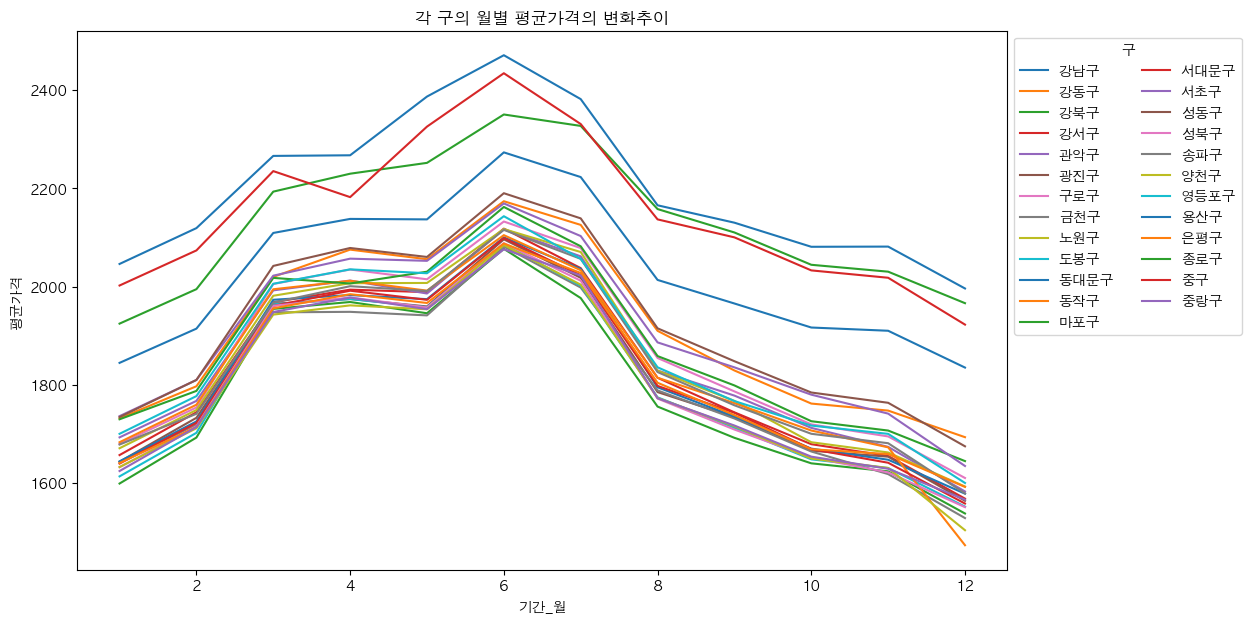

In [43]:
# 각 구의 월별 평균가격의 변화추이 시각화
# plt.figure(figsize=(12,7))
# sns.lineplot(data=dr, x='기간_월', y='휘발유', hue='지역구')

## 선생님 버전 ###
구별_월별평균휘발유가격.plot(figsize=(12,7), title='각 구의 월별 평균가격의 변화추이', 
                 ylabel='평균가격')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=2, title='구')

In [97]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)

# expensive = df[df['휘발유']!=0].sort_values('휘발유').drop_duplicates('상호').tail()
# expensive

# 선생님 버전 #
# df.loc[df['휘발유'].sort_values(ascending=False).head().index]   ## 왜 loc으로 묶었지??? 내가 해봐야...
# 근데 이것은 같은 주소에 같은 가게가 여러개 나올수도 있어서 구분해서 아래 다시 분류해봤다. 

비싼주유소 = df.groupby(['상호', '주소'])['휘발유'].max().sort_values(ascending=False).head(5) #상호에 주소까지 넣어서 중복은 제외함.
비싼주유소

상호      주소                     
서남주유소   서울 중구 통일로 30               3096
서계주유소   서울 용산구  청파로 367 (청파동)      3050
필동주유소   서울 중구 퇴계로 196 (필동2가)       2789
동자동주유소  서울 용산구 한강대로104길 6 (동자동)    2690
한석주유소   서울 용산구 이촌로 164             2681
Name: 휘발유, dtype: int64

In [106]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
# df.groupby('상호')['휘발유'].mean().sort_values(ascending=False).head(5)

# cheap = df[df['휘발유']!=0].sort_values('휘발유').drop_duplicates('상호').head(5)
# cheap

## 선생님 버전 ##-비싼 가격 기준에서 저렴한 곳
저렴한주유소 = df.query('휘발유!=0').groupby(['상호', '주소'])['휘발유'].max().sort_values().head(5)

# df.query('휘발유!=0').groupby(['상호', '주소'])['휘발유'].min().sort_values().head(5) #가장 저렴한 곳
#위에 복붙해서 acsending은 삭제해서 오름차순으로 변경함.
저렴한주유소

상호                 주소                       
(주)동원석유            경기도 부천시 원미구  부흥로 182 (중동)    1654
송파알찬주유소            서울 송파구 백제고분로 229 (삼전동)       1690
(주)명보에너지           경기도 시흥시  수인로 2186 (목감동)      1755
정다운셀프주유소           서울 도봉구 도봉로 635               1759
오션네트웍스(주) 서울식물원지점  서울 강서구 양천로 300               1940
Name: 휘발유, dtype: int64

In [44]:
 df.query('휘발유!=0').groupby(['상호', '주소'])['휘발유'].min().sort_values().head(5) #가장 저렴한 곳

상호               주소                    
화곡역주유소           서울 강서구 강서로 154 (화곡동)      1410
현대주유소            서울 양천구 남부순환로 372 (신월동)    1410
이케이에너지(주) 강서주유소  서울 강서구 화곡로 273 (화곡동)      1410
뉴신정주유소           서울 강서구 곰달래로 207 (화곡동)     1415
목화주유소            서울 강서구 국회대로 251 (화곡동)     1430
Name: 휘발유, dtype: int64

In [108]:
df.query('상호== "서남주유소"')[['상호', '주소', '지역', '상표','경유']].drop_duplicates()  #중복 행을 제거-검색해서 공부해보자.

,상호,주소,지역,상표,경유
78766,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2288
78769,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2316
78776,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2335
78783,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2376
78793,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2010
78797,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,1599
78799,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2410
78801,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2425
78804,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2461
78811,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2472


In [111]:
# index나 컬럼명이 여러개 => Multi-Index
# 특정 Level의 index를 조회 (Level-> 밖에서 안쪽으로 0 ~ N 1씩 증가. (음수index도 있다.)
저렴한주유소.index  #상호, 주소, 가격
저렴한주유소.index.get_level_values(0)  # 인덱스 0번이므로 상호만 출력.
저렴한주유소.index.get_level_values(1)  # 인덱스 1번이므로 주소만 출력.

Index(['경기도 부천시 원미구  부흥로 182 (중동)', '서울 송파구 백제고분로 229 (삼전동)',
       '경기도 시흥시  수인로 2186 (목감동)', '서울 도봉구 도봉로 635', '서울 강서구 양천로 300'],
      dtype='object', name='주소')

In [118]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates) 
#      ==> 비싼 주유소 조회결과 추가정보 확인을 위해 내준 문제
# expensive.filter(items=['상호', '지역', '주소'])

# 선생님 버전 ##
df.loc[df['상호'].isin(비싼주유소.index.get_level_values(0)) & 
       df['주소'].isin(비싼주유소.index.get_level_values(1)),['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
72190,동자동주유소,서울 용산구,서울 용산구 한강대로104길 6 (동자동)
72371,서계주유소,서울 용산구,서울 용산구 청파로 367 (청파동)
73095,한석주유소,서울 용산구,서울 용산구 이촌로 164
78766,서남주유소,서울 중구,서울 중구 통일로 30
79846,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)


In [122]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
#      ==> 저렴한 주유소 조회결과 추가정보 확인을 위해 내준 문제

# cheap.filter(items=['상호', '지역', '주소'])

## 선생님 버전 ## - 비싼 주유소와는 다른 방식으로 
df.query("상호 in @저렴한주유소.index.get_level_values(0) and 주소 in @저렴한주유소.index.get_level_values(1)")\#\->다음줄 연결 표시
                                                            [['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
25556,(주)명보에너지,서울 금천구,경기도 시흥시 수인로 2186 (목감동)
32304,정다운셀프주유소,서울 도봉구,서울 도봉구 도봉로 635
43575,(주)동원석유,서울 서초구,경기도 부천시 원미구 부흥로 182 (중동)
59953,송파알찬주유소,서울 송파구,서울 송파구 백제고분로 229 (삼전동)
97148,오션네트웍스(주) 서울식물원지점,서울 강서구,서울 강서구 양천로 300


In [127]:
# 고급 휘발유를 가장 많이 파는 구 조회
## 선생님 버전 ##
df.query('고급휘발유!=0').groupby('지역구')['고급휘발유'].count().to_frame()  # 동일한 주유소까지 같이 중복 count 됨.!
                                                                       # 그래서! 아래처럼 조회~~!!!!

,고급휘발유
지역구,
강남구,10784
강동구,1553
강북구,1211
강서구,4515
관악구,1822
광진구,2519
구로구,1598
금천구,1662
노원구,2361


In [132]:
# 고급 휘발유를 가장 많이 파는 구 조회
# 선생님 버전 2 ##
df.query('고급휘발유!=0')[['지역구','상호','주소']].drop_duplicates().groupby('지역구').count()['상호']\
.sort_values(ascending=False).to_frame()

,상호
지역구,
강남구,30
서초구,26
송파구,18
성북구,15
강서구,13
용산구,13
영등포구,13
성동구,11
종로구,9


In [ ]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################
